# Feature Selection (RFE) and PCA : Travel Package Purchase Prediction

## Problem Statement

### Context

The policymaker of a tourism company named "Visit with us" wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, and King. Looking at the data of the last year, it was observed that 18% of the customers purchased the packages. However, it was difficult to identify the potential customers because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is a package that allows the traveler to maintain, enhance, or kick-start a healthy lifestyle, and support or increase one's sense of well-being. For the launch of the new package, the company wants to harness the available data of existing and potential customers to target the right customers.

### Objective

You as a Data Scientist at "Visit with us" travel company has to analyze the customer data and information to provide recommendations to the policymaker and build a model to predict the chances of a potential customer purchasing the newly introduced travel package before the customer is contacted.

### Data Dictionary

- CustomerID: Unique customer ID
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in.
- DurationOfPitch: Duration of the pitch by a salesperson to the customer
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- ProductPitched: Product pitched by the salesperson
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trips in a year by customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- PitchSatisfactionScore: Sales pitch satisfaction score
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer

## **Please read the instructions carefully before starting the project.**

This is a commented  Colab Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.

## Importing necessary libraries

In [ ]:
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.tree import DecisionTreeClassifier


# Libraries to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

## Loading the dataset

In [ ]:
# Load the dataset
data = pd.read_excel('Tourism.xlsx')

## Data Overview

The initial steps to get an overview of any dataset is to:
- Observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- Get information about the number of rows and columns in the dataset
- Find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- Check the statistical summary of the dataset to get an overview of the numerical columns of the data

### View the first and last 5 rows of the dataset.

In [ ]:
data.head() ##  Complete the code to view top 5 rows of the data

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [ ]:
data.tail() ##  Complete the code to view last 5 rows of the data

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


### Understand the shape of the dataset.

In [ ]:
data.shape ##  Complete the code to view dimensions of the data

(4888, 20)

### Check the data types of the columns for the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

### Checking the Statistical Summary

In [ ]:
data.describe().T  ## Complete the code to get the statistical summary of the data

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


### Checking for unique values for each of the column

In [ ]:
cols_cat= data.select_dtypes(['int64']) ##Unique values for integer datatype
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in CustomerID are :
CustomerID
200000    1
203256    1
203263    1
203262    1
203261    1
         ..
201628    1
201627    1
201626    1
201625    1
204887    1
Name: count, Length: 4888, dtype: int64
**************************************************
Unique values in ProdTaken are :
ProdTaken
0    3968
1     920
Name: count, dtype: int64
**************************************************
Unique values in CityTier are :
CityTier
1    3190
3    1500
2     198
Name: count, dtype: int64
**************************************************
Unique values in NumberOfPersonVisiting are :
NumberOfPersonVisiting
3    2402
2    1418
4    1026
1      39
5       3
Name: count, dtype: int64
**************************************************
Unique values in Passport are :
Passport
0    3466
1    1422
Name: count, dtype: int64
**************************************************
Unique values in PitchSatisfactionScore are :
PitchSatisfactionScore
3    1478
5     970
1     942
4     912
2

Customer_ID is unique to each row and will need to be dropped.

In [ ]:
cols_cat= data.select_dtypes(['float64']) ##Unique values for float datatype
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*10)

Unique values in Age are :
Age
35.0    237
36.0    231
34.0    211
31.0    203
30.0    199
32.0    197
33.0    189
37.0    185
29.0    178
38.0    176
41.0    155
39.0    150
28.0    147
40.0    146
42.0    142
27.0    138
43.0    130
46.0    121
45.0    116
26.0    106
44.0    105
51.0     90
47.0     88
50.0     86
25.0     74
52.0     68
53.0     66
48.0     65
49.0     65
55.0     64
54.0     61
56.0     58
24.0     56
22.0     46
23.0     46
59.0     44
21.0     41
20.0     38
19.0     32
58.0     31
57.0     29
60.0     29
18.0     14
61.0      9
Name: count, dtype: int64
**********
Unique values in DurationOfPitch are :
DurationOfPitch
9.0      483
7.0      342
8.0      333
6.0      307
16.0     274
15.0     269
14.0     253
10.0     244
13.0     223
11.0     205
12.0     195
17.0     172
30.0      95
22.0      89
31.0      83
23.0      79
18.0      75
29.0      74
32.0      74
25.0      73
21.0      73
27.0      72
26.0      72
24.0      70
35.0      66
20.0      65
28.0      6

In [ ]:
cols_cat= data.select_dtypes(['object'])
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in TypeofContact are :
TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64
**************************************************
Unique values in Occupation are :
Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64
**************************************************
Unique values in Gender are :
Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64
**************************************************
Unique values in ProductPitched are :
ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64
**************************************************
Unique values in MaritalStatus are :
MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64
**************************************************
Unique values

There are couple of values as 'Fe male' instead of 'Female'.

In [ ]:
data.drop(['CustomerID'],axis=1,inplace=True) ## Complete the code to drop the CustomerID column from the dataframe

### Checking for Missing Values

In [ ]:
data.isna().sum() ## Complete the code to check the missing values for each of the columns

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

Age, TypeofContact, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting and MonthlyIncome have missing values.

## Data Preprocessing

### Checking for anomalous/repetitive values

In [ ]:
#Making a list of all categorical variables
cat_col=['TypeofContact', 'CityTier','Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation']

#Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print('-'*50)

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64
--------------------------------------------------
CityTier
1    3190
3    1500
2     198
Name: count, dtype: int64
--------------------------------------------------
Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64
--------------------------------------------------
Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64
--------------------------------------------------
NumberOfPersonVisiting
3    2402
2    1418
4    1026
1      39
5       3
Name: count, dtype: int64
--------------------------------------------------
NumberOfFollowups
4.0    2068
3.0    1466
5.0     768
2.0     229
1.0     176
6.0     136
Name: count, dtype: int64
--------------------------------------------------
ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             

In [ ]:
#Replacing 'Fe Male' with 'Female'
data.Gender=data.Gender.replace('Fe Male', 'Female')

In [ ]:
#Converting the data type of each categorical variable to 'category'
for column in cat_col:
    data[column]=data[column].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   int64   
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   category
 8   NumberOfFollowups         4843 non-null   category
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   category
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   catego

In [ ]:
## Creating a copy of data to perform detailed EDA in the appendix section
df = data.copy()

## Exploratory Data Analysis

### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on Age

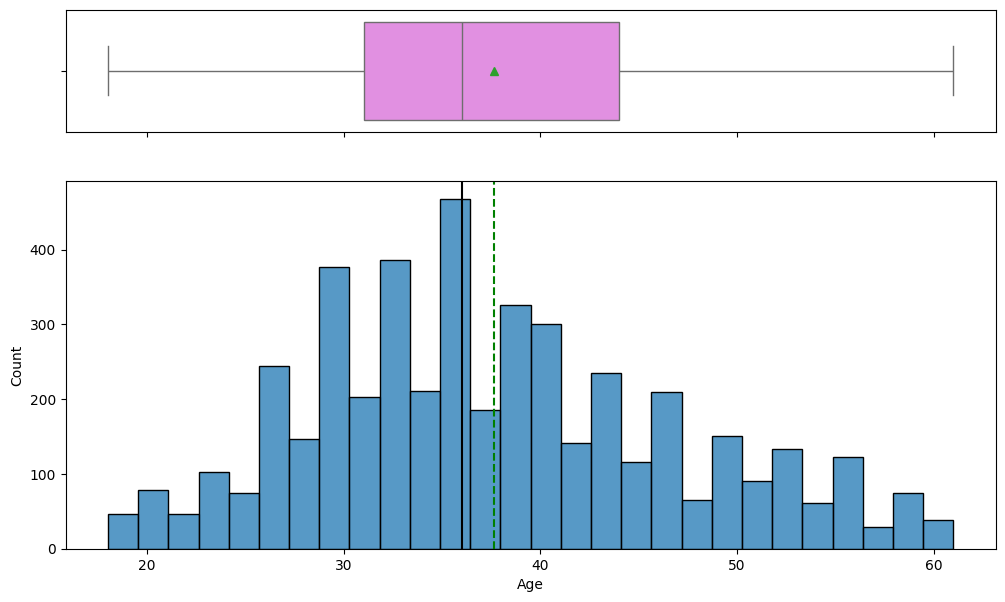

In [ ]:
histogram_boxplot(df, "Age")

Age is a normal distribution.

#### Observations on Duration of Pitch

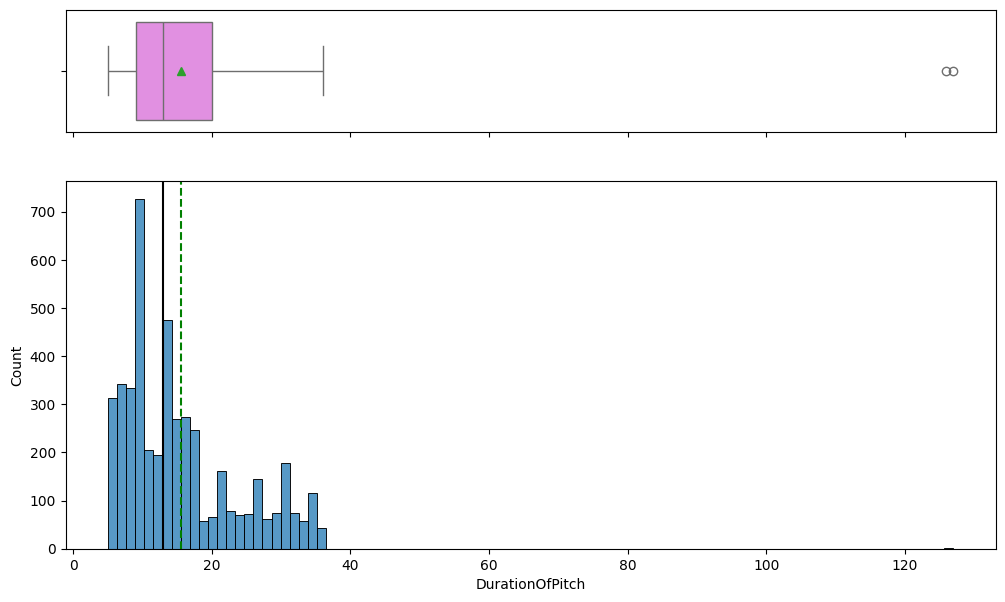

In [ ]:
histogram_boxplot(df, 'DurationOfPitch') ## Complete the code to create histogram_boxplot for Duration of pitch

#### Observations on Monthly Income

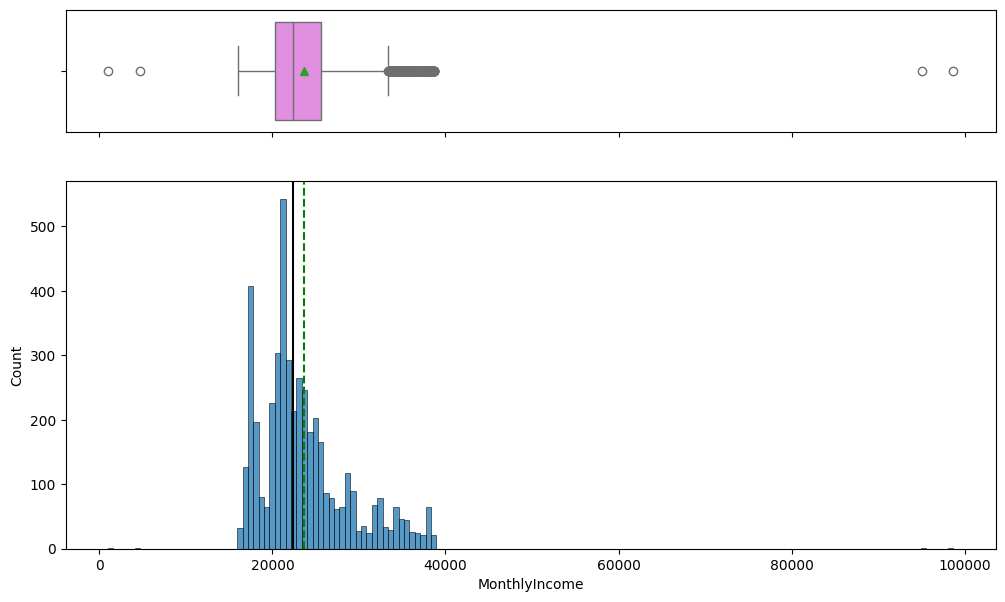

In [ ]:
histogram_boxplot(df, 'MonthlyIncome') ## Complete the code to create histogram_boxplot for Monthly Income

#### Observations on Number of Trips

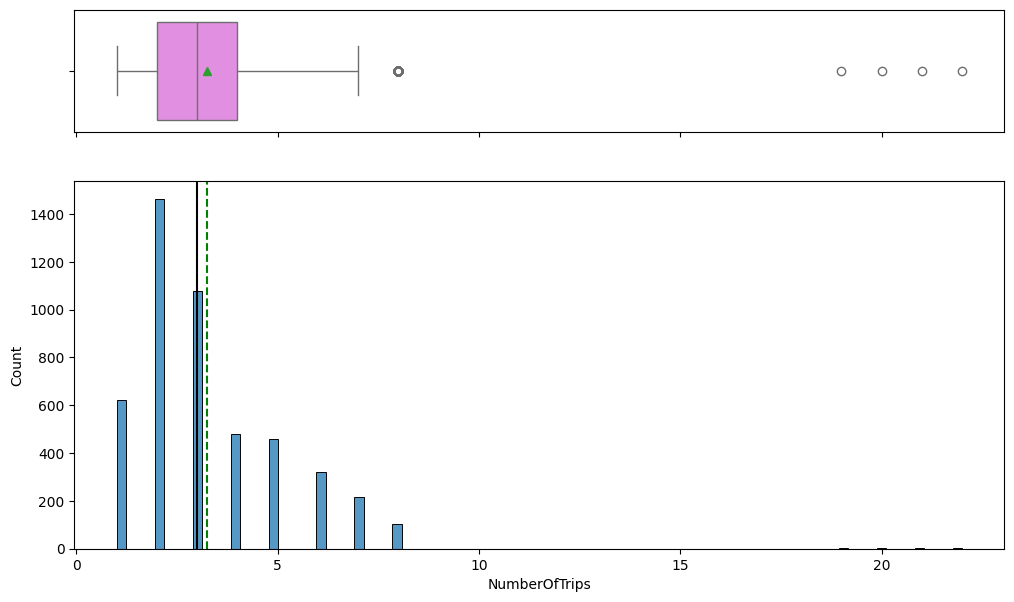

In [ ]:
histogram_boxplot(df, 'NumberOfTrips') ## Complete the code to create histogram_boxplot for Number of Trips

There seems to be some outliers here.

#### Observations on Number of Person Visiting

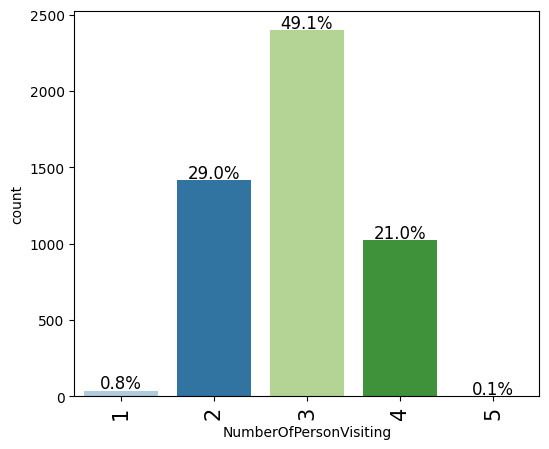

In [ ]:
labeled_barplot(df, "NumberOfPersonVisiting", perc=True)

#### Observations on Occupation

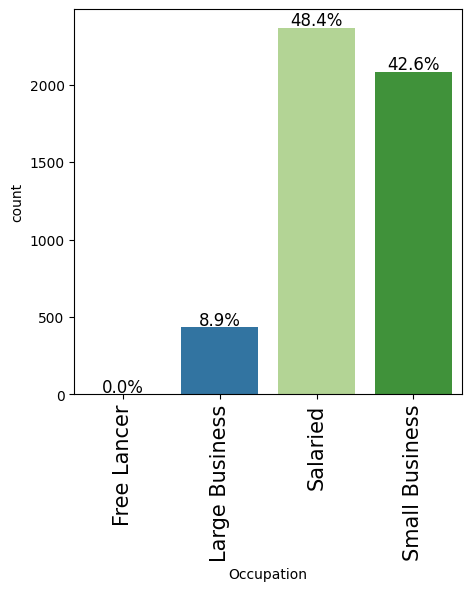

In [ ]:
labeled_barplot(df, "Occupation", perc=True) ## Complete the code to create labeled_barplot for Ocuupation

Majority of the people are salaried followed by small business.

#### Observations on City Tier

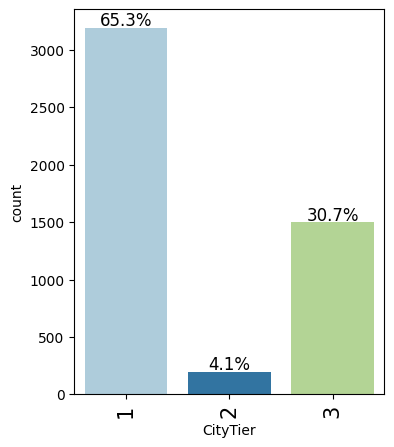

In [ ]:
labeled_barplot(df, "CityTier", perc=True) ## Complete the code to create labeled_barplot for City Tier

#### Observations on Gender

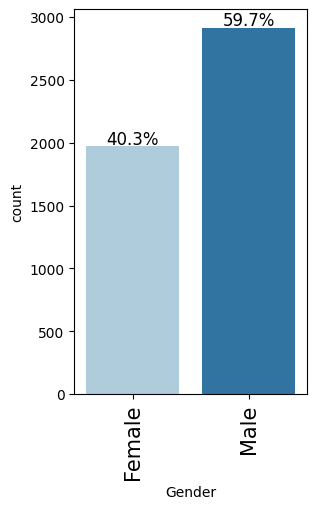

In [ ]:
labeled_barplot(df, "Gender", perc=True) ## Complete the code to create labeled_barplot for Gender

#### Observations on Number of Follow ups

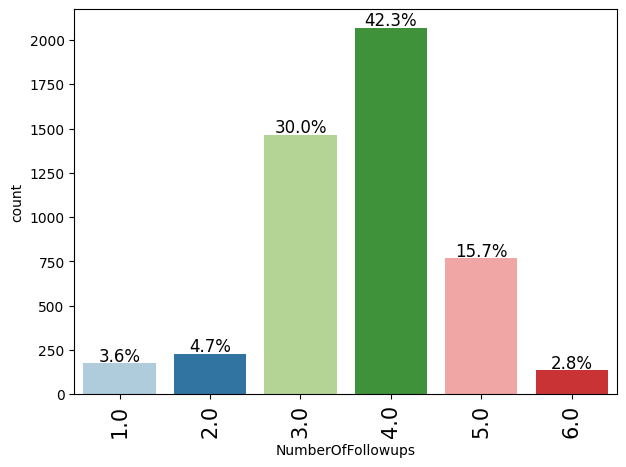

In [ ]:
labeled_barplot(df, "NumberOfFollowups", perc=True) ## Complete the code to create labeled_barplot for Number of follow ups

#### Observations on Product Pitched

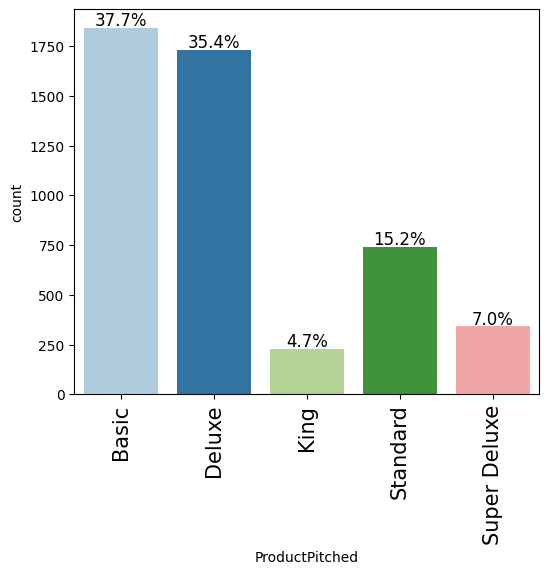

In [ ]:
 labeled_barplot(df, "ProductPitched", perc=True) ## Complete the code to create labeled_barplot for Product Pitched

#### Observations on Preferred Property Star

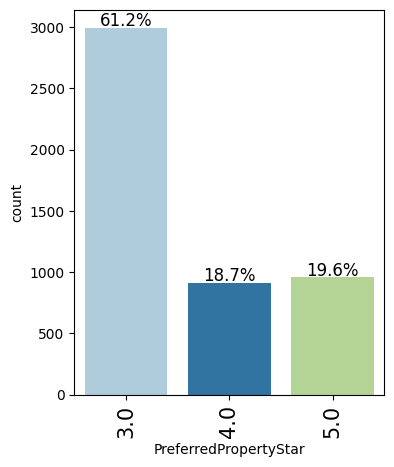

In [ ]:
 labeled_barplot(df, "PreferredPropertyStar", perc=True)  ## Complete the code to create labeled_barplot for Preferred property star

#### Observations on Type of Contact

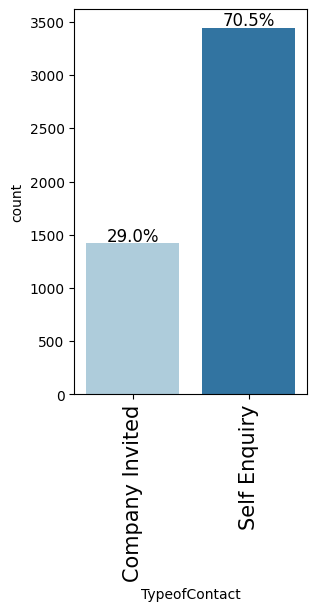

In [ ]:
labeled_barplot(df, "TypeofContact", perc=True) ## Complete the code to create labeled_barplot for Type of contact

#### Observations on Marital Status

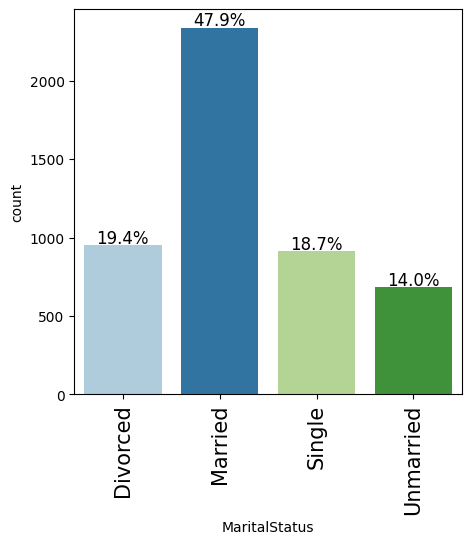

In [ ]:
labeled_barplot(df, "MaritalStatus", perc=True) ## Complete the code to create labeled_barplot for Marital Status

#### Observations on Passport

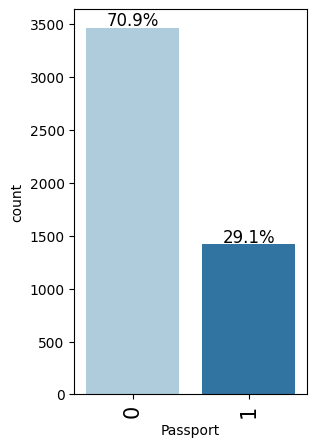

In [ ]:
labeled_barplot(df, "Passport", perc=True) ## Complete the code to create labeled_barplot for Passport

#### Observations on Pitch Satisfaction Score

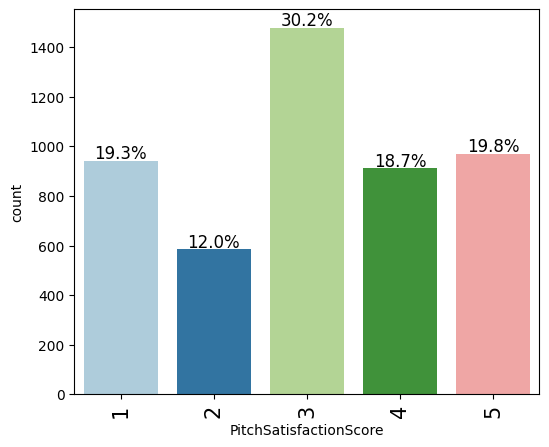

In [ ]:
labeled_barplot(df, "PitchSatisfactionScore", perc=True) ## Complete the code to create labeled_barplot for Satisfication score

#### Observations on Designation

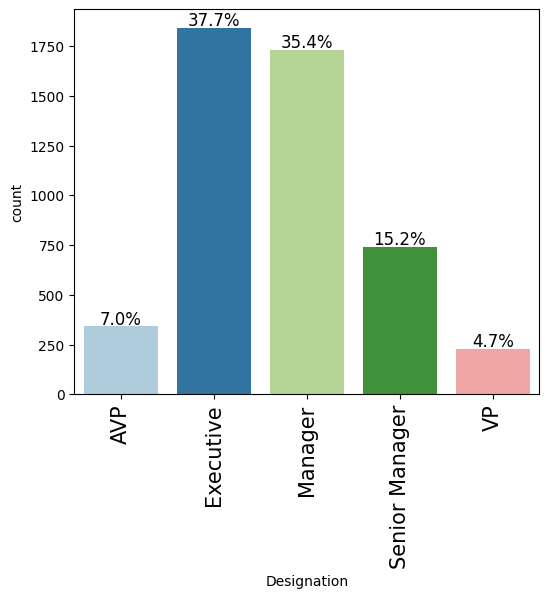

In [ ]:
labeled_barplot(df, "Designation", perc=True) ## Complete the code to create labeled_barplot for Designation

#### Observations on Number of Children Visiting

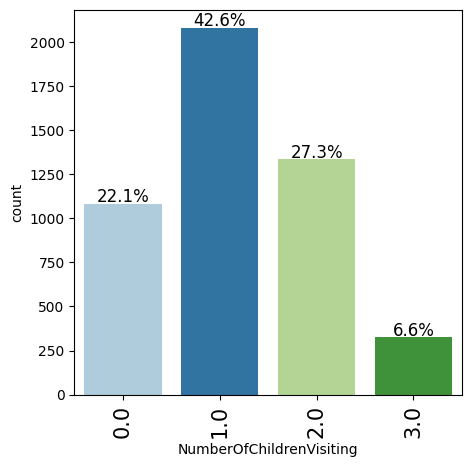

In [ ]:
labeled_barplot(df, "NumberOfChildrenVisiting", perc=True) ## Complete the code to create labeled_barplot for Number of children visiting

#### Observations on Product Taken

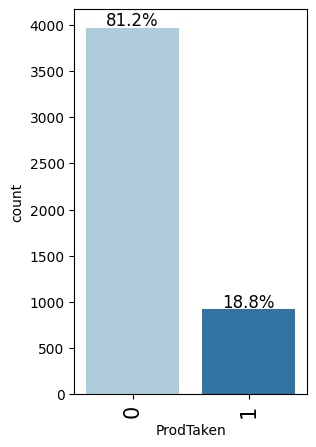

In [ ]:
labeled_barplot(df, "ProdTaken", perc=True) ## Complete the code to create labeled_barplot for Product Taken

### Bivariate Analysis

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Prod Taken vs Number of Person Visiting

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
All                     3968  920  4888
3                       1942  460  2402
2                       1151  267  1418
4                        833  193  1026
1                         39    0    39
5                          3    0     3
------------------------------------------------------------------------------------------------------------------------


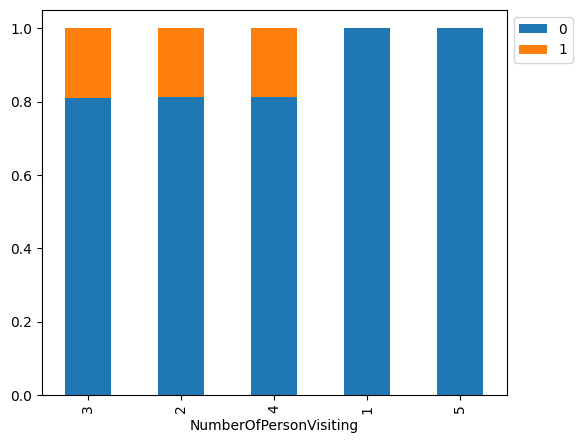

In [ ]:
stacked_barplot(df, "NumberOfPersonVisiting", "ProdTaken" )

#### Prod Taken vs Number of Follow ups

ProdTaken             0    1   All
NumberOfFollowups                 
All                3931  912  4843
4.0                1689  379  2068
3.0                1222  244  1466
5.0                 577  191   768
6.0                  82   54   136
2.0                 205   24   229
1.0                 156   20   176
------------------------------------------------------------------------------------------------------------------------


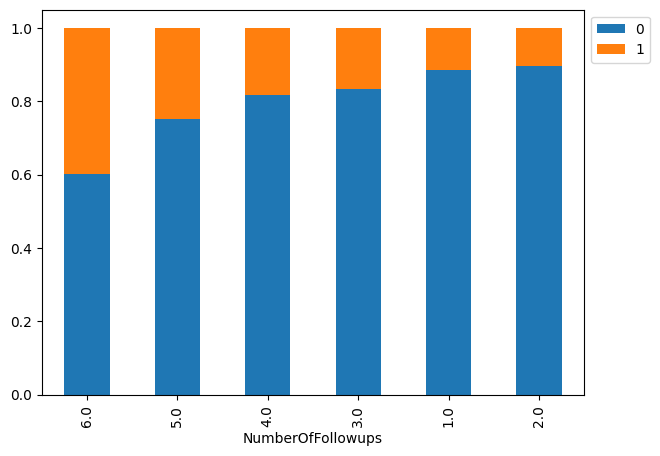

In [ ]:
stacked_barplot(df, "NumberOfFollowups", "ProdTaken" )  ## Complete the code to plot stacked barplot for Prod taken and Number of follow ups

#### Prod Taken vs Occupation

Occupation         Free Lancer  Large Business  Salaried  Small Business   All
NumberOfFollowups                                                             
All                          2             432      2348            2061  4843
4.0                          1             192       987             888  2068
5.0                          1              68       380             319   768
1.0                          0              11        91              74   176
2.0                          0              12       120              97   229
3.0                          0             138       696             632  1466
6.0                          0              11        74              51   136
------------------------------------------------------------------------------------------------------------------------


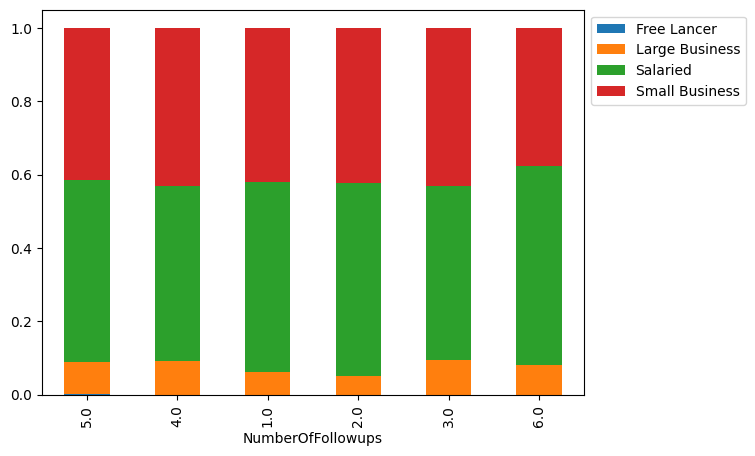

In [ ]:
stacked_barplot(df, "NumberOfFollowups", "Occupation")  ## Complete the code to plot stacked barplot for Prod taken and Occupation

#### Prod Taken vs Marital Status

ProdTaken         0    1   All
MaritalStatus                 
All            3968  920  4888
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
Divorced        826  124   950
------------------------------------------------------------------------------------------------------------------------


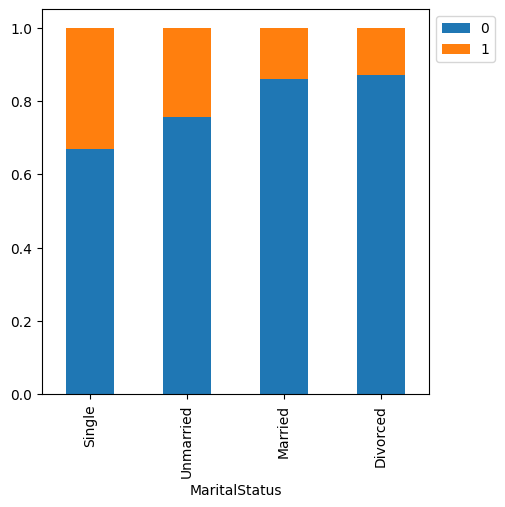

In [ ]:
stacked_barplot(df, "MaritalStatus", "ProdTaken" )  ## Complete the code to plot stacked barplot for Prod taken and Marital status

#### Prod Taken vs Passport

ProdTaken     0    1   All
Passport                  
All        3968  920  4888
1           928  494  1422
0          3040  426  3466
------------------------------------------------------------------------------------------------------------------------


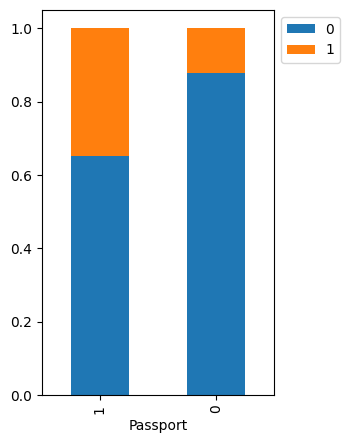

In [ ]:
stacked_barplot(df, "Passport", "ProdTaken")  ## Complete the code to plot stacked barplot for Prod taken and Passport

#### Prod Taken vs Product Pitched

ProductPitched  Basic  Deluxe  King  Standard  Super Deluxe   All
MaritalStatus                                                    
All              1842    1732   230       742           342  4888
Married           816     852   126       380           166  2340
Divorced          332     336    52       142            88   950
Single            511     221    52        50            82   916
Unmarried         183     323     0       170             6   682
------------------------------------------------------------------------------------------------------------------------


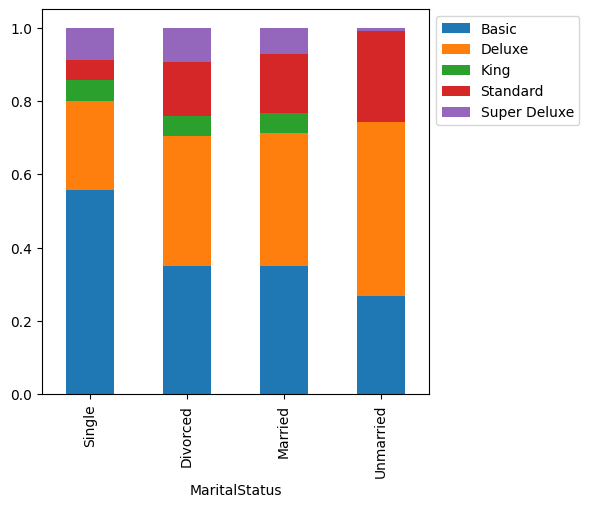

In [ ]:
stacked_barplot(df, "MaritalStatus", "ProductPitched")  ## Complete the code to plot stacked barplot for Prod taken and Product pitched

#### Prod Taken vs Designation

ProdTaken          0    1   All
Designation                    
All             3968  920  4888
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230
------------------------------------------------------------------------------------------------------------------------


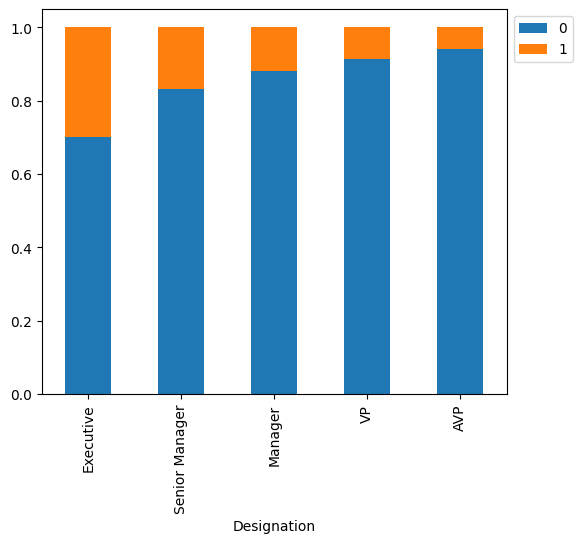

In [ ]:
stacked_barplot(df, "Designation", "ProdTaken")  ## Complete the code to plot stacked barplot for Prod taken and Designation

#### Prod Taken vs Duration of Pitch

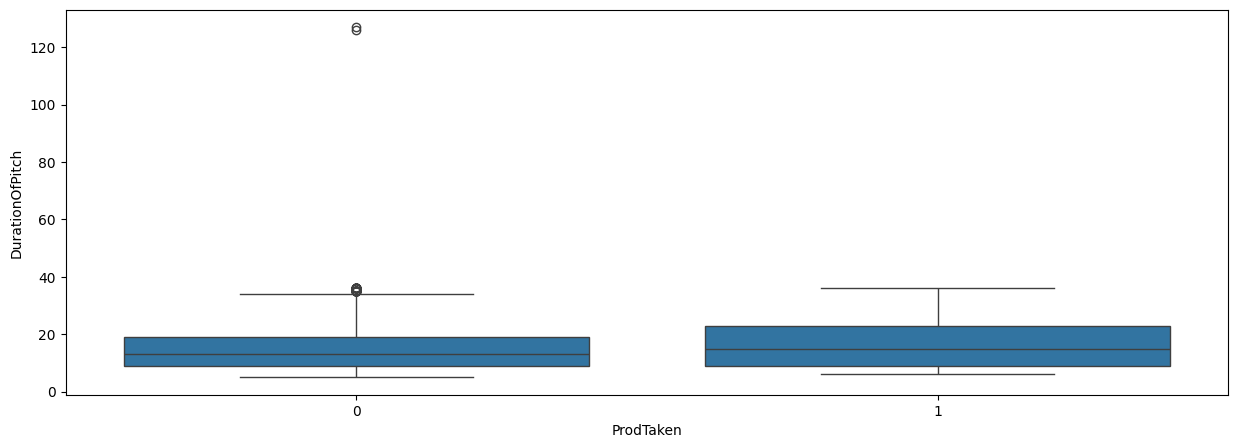

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(y='DurationOfPitch',x='ProdTaken',data=df)
plt.show()

#### Prod Taken vs Monthly Income

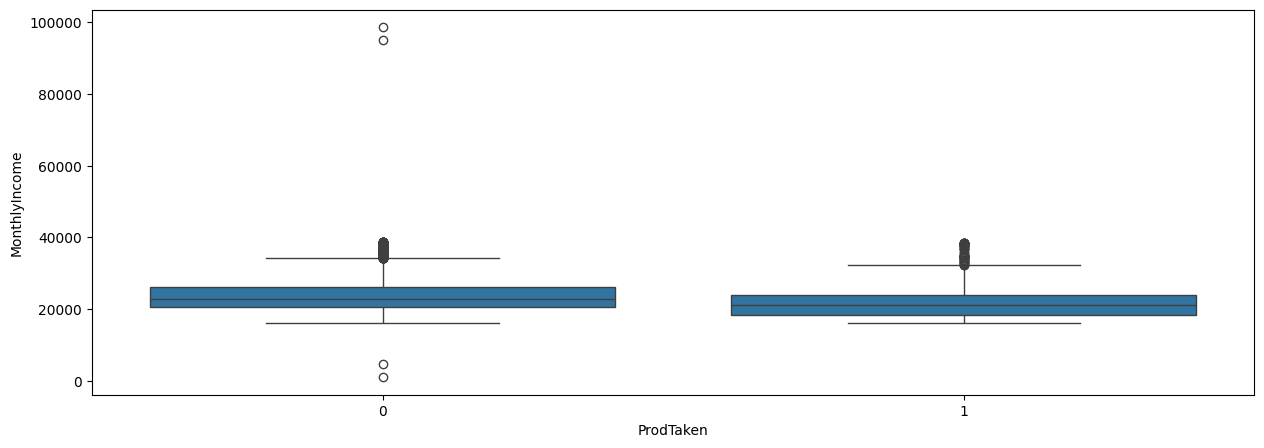

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(y='MonthlyIncome',x='ProdTaken',data=df) ## Complete the code to plot boxplot for Prod taken and Monthly income
plt.show()

#### Prod Taken vs Designation

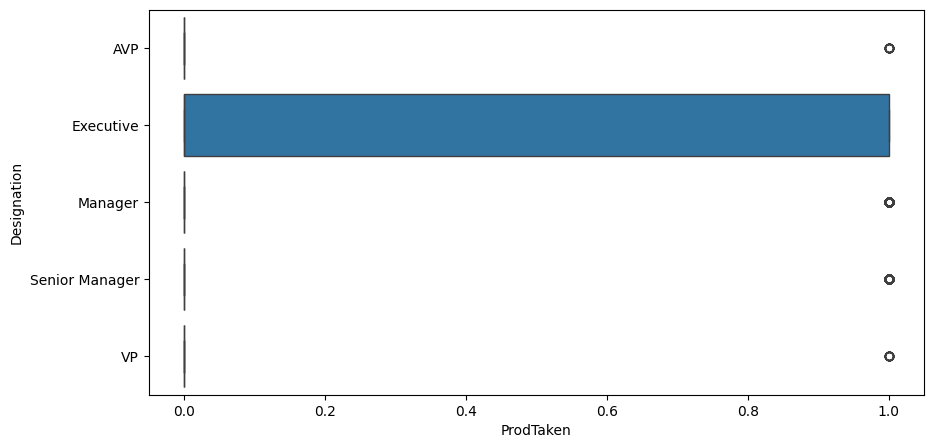

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(y='Designation',x='ProdTaken',data=df) ## Complete the code to plot boxplot for Prod taken and Designation
plt.show()

#### Customer Profiles by Travel Package

In [ ]:
data[(data['ProductPitched']=='Basic') & (data['ProdTaken']==1)].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,552.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,515.0,NaN,NaN,NaN,31.28932,9.070829,18.0,25.0,30.0,35.0,59.0
TypeofContact,549,2,Self Enquiry,355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,552.0,3.0,1.0,392.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,532.0,NaN,NaN,NaN,15.791353,7.906926,6.0,9.0,14.0,22.0,36.0
Occupation,552,4,Salaried,260,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,552,2,Male,344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,552.0,3.0,3.0,276.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,548.0,6.0,4.0,235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductPitched,552,1,Basic,552,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data[(data['ProductPitched']=='Standard') & (data['ProdTaken']==1)].describe(include='all').T   ### Complete the code to check the customer profile for Standard travel package

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,124.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,123.0,NaN,NaN,NaN,41.00813,9.876695,19.0,33.0,38.0,49.0,60.0
TypeofContact,124,2,Self Enquiry,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,124.0,3.0,3.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,123.0,NaN,NaN,NaN,19.065041,9.048811,6.0,11.0,17.0,29.0,36.0
Occupation,124,3,Small Business,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,124,2,Male,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,124.0,3.0,3.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,124.0,6.0,4.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductPitched,124,1,Standard,124,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data[(data['ProductPitched']=='Deluxe') & (data['ProdTaken']==1)].describe(include='all').T   ### Complete the code to check the customer profile for Deluxe travel package

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,204.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,198.0,NaN,NaN,NaN,37.641414,8.469575,21.0,32.0,35.5,44.0,59.0
TypeofContact,204,2,Self Enquiry,136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,204.0,2.0,3.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,180.0,NaN,NaN,NaN,19.1,9.227176,6.0,11.0,16.0,28.0,36.0
Occupation,204,3,Small Business,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,204,2,Male,134,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,204.0,3.0,3.0,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,200.0,6.0,4.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductPitched,204,1,Deluxe,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data[(data['ProductPitched']=='Super Deluxe') & (data['ProdTaken']==1)].describe(include='all').T   ### Complete the code to check the customer profile for Super Deluxe travel package

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,20.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,20.0,NaN,NaN,NaN,43.5,4.83953,39.0,40.0,42.0,45.25,56.0
TypeofContact,20,2,Company Invited,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,20.0,2.0,3.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,20.0,NaN,NaN,NaN,18.5,7.330542,8.0,15.0,18.5,20.0,31.0
Occupation,20,2,Salaried,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,20,2,Male,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,20.0,3.0,3.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,20.0,6.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductPitched,20,1,Super Deluxe,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data[(data['ProductPitched']=='King') & (data['ProdTaken']==1)].describe(include='all').T   ### Complete the code to check the customer profile for King travel package

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,20.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,20.0,NaN,NaN,NaN,48.9,9.618513,27.0,42.0,52.5,56.0,59.0
TypeofContact,20,1,Self Enquiry,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,20.0,2.0,1.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,20.0,NaN,NaN,NaN,10.5,4.135851,8.0,8.0,9.0,9.0,19.0
Occupation,20,3,Small Business,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,20,2,Female,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,20.0,3.0,3.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,20.0,4.0,3.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductPitched,20,1,King,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Preprocessing (contd.)

### Outlier Detection and Treatment

**Look for categories with significantly higher or lower percentages compared to the rest to identify outliers**

In [ ]:
100*data.NumberOfTrips.value_counts(normalize=True)

NumberOfTrips
2.0     30.834035
3.0     22.725358
1.0     13.058130
4.0     10.067397
5.0      9.646167
6.0      6.781803
7.0      4.591407
8.0      2.211457
19.0     0.021061
21.0     0.021061
20.0     0.021061
22.0     0.021061
Name: proportion, dtype: float64

Observations - Perform outlier detection using the value counts for both "Monthly Income" and "DurationOfPitch"

*


**Removing these outliers from duration of pitch, monthly income, and number of trips.**

In [ ]:
#Dropping observaions with duration of pitch greater than 40. There are just 2 such observations
data.drop(index=data[data.DurationOfPitch>37].index,inplace=True)

#Dropping observation with monthly income less than 12000 or greater than 40000. There are just 4 such observations
data.drop(index=data[(data.MonthlyIncome>40000) | (data.MonthlyIncome<12000)].index,inplace=True)

#Dropping observations with number of trips greater than 8. There are just 4 such observations
data.drop(index=data[data.NumberOfTrips>8].index,inplace=True)

### Data Preparation for Modeling

- The objective is to predict which customer is potentially going to purchase the newly introduced travel package.
- Before you proceed to build a model, you need to split the data into train, test and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale numerical values.
- You will build a model using the train data and then check it's performance

 **As we aim to predict customers who are more likely to buy the product, we should drop the columns `DurationOfPitch', 'NumberOfFollowups', 'ProductPitched', 'PitchSatisfactionScore'` as these columns would not be available at the time of prediction for new data.**

In [ ]:
#Dropping columns
data.drop(columns=['DurationOfPitch', 'NumberOfFollowups', 'ProductPitched', 'PitchSatisfactionScore' ],inplace=True) ## Complete the code to drop the above mentioned columns

In [ ]:
#Separating target variable and other variables
X=data.drop(columns='ProdTaken')
Y=data.ProdTaken

In [ ]:
# Complete the code to split data in train and test sets
X_train,X_test,y_train,y_test=train_test_split(X, Y,test_size=0.30,random_state=1,stratify=Y)
print(X_train.shape, X_test.shape)



(3414, 14) (1464, 14)


- As we saw earlier, our data has missing values. We will impute missing values using median for continuous variables and mode for categorical variables. We will use `SimpleImputer` to do this.**

- The `SimpleImputer` provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median, or most frequent) of each column in which the missing values are located.

In [ ]:
# Initializing the SimpleImputer method with median
si1=SimpleImputer(strategy='median')

# Assigning the columns to be imputed
median_imputed_col=['Age','MonthlyIncome','NumberOfTrips']

#Fit and transform the train data
X_train[median_imputed_col]=si1.fit_transform(X_train[median_imputed_col])

#Transform the test data i.e. replace missing values with the median calculated using training data
X_test[median_imputed_col]=si1.transform(X_test[median_imputed_col])

In [ ]:
data.columns = (data.columns.str.strip().str.upper()
              .str.replace(' ', '_')
              .str.replace('(', '')
              .str.replace(')', ''))

In [ ]:
# Initializing the SimpleImputer method with most_frequent
si2=SimpleImputer(strategy='most_frequent')

# Assigning the columns to be imputed
mode_imputed_col=['TypeofContact','PreferredPropertyStar','NumberOfChildrenVisiting']

#Fit and transform the train data
X_train[mode_imputed_col]=si2.fit_transform(X_train[mode_imputed_col])

#Transform the test data i.e. replace missing values with the mode calculated using training data
X_test[mode_imputed_col]=si2.transform(X_test[mode_imputed_col])

In [ ]:
print(X_train.isna().sum())  ## Complete the code to check the missing values in train data
print('-'*30)
print(X_train)          ## Complete the code to check the missing values in train data

Age                         0
TypeofContact               0
CityTier                    0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64
------------------------------
       Age    TypeofContact CityTier      Occupation  Gender  \
2278  29.0     Self Enquiry        1        Salaried  Female   
1706  33.0     Self Enquiry        1        Salaried  Female   
1807  36.0     Self Enquiry        1        Salaried    Male   
2267  26.0     Self Enquiry        1  Small Business    Male   
1248  36.0     Self Enquiry        1  Small Business  Female   
...    ...              ...      ...             ...     ...   
2522  38.0     Self Enquiry        1  Small Business    Male   
931   30.0  Company Invi

**Let's create dummy variables for string type variables and convert other column types back to float.**

In [ ]:
#converting data types of columns to float
for column in ['NumberOfPersonVisiting', 'Passport', 'OwnCar']:
    X_train[column]=X_train[column].astype('float')
    X_test[column]=X_test[column].astype('float')

In [ ]:
#List of columns to create a dummy variables
col_dummy=['TypeofContact','Occupation','Gender','MaritalStatus','Designation','CityTier']

In [ ]:
print (col_dummy)

['TypeofContact', 'Occupation', 'Gender', 'MaritalStatus', 'Designation', 'CityTier']


In [ ]:
#Encoding categorical varaibles
X_train=pd.get_dummies(X_train, columns=col_dummy, drop_first=True) ## Complete the code to apply dummies on train data
X_test=pd.get_dummies(X_test, columns=col_dummy, drop_first=True)    ## Complete the code to apply dummies on test data

In [ ]:
print(X_train.isna().sum())  ## Complete the code to check the missing values in train data
print('-'*30)


Age                           0
NumberOfPersonVisiting        0
PreferredPropertyStar         0
NumberOfTrips                 0
Passport                      0
OwnCar                        0
NumberOfChildrenVisiting      0
MonthlyIncome                 0
TypeofContact_Self Enquiry    0
Occupation_Large Business     0
Occupation_Salaried           0
Occupation_Small Business     0
Gender_Male                   0
MaritalStatus_Married         0
MaritalStatus_Single          0
MaritalStatus_Unmarried       0
Designation_Executive         0
Designation_Manager           0
Designation_Senior Manager    0
Designation_VP                0
CityTier_2                    0
CityTier_3                    0
dtype: int64
------------------------------


 All imputations were carried out after Train and test split

In [ ]:
# Initializing the SimpleImputer method with median
si1=SimpleImputer(strategy='median')

# Assigning the columns to be imputed
median_imputed_col=['Age','MonthlyIncome','NumberOfTrips']

#Fit and transform the train data
X_train[median_imputed_col]=si1.fit_transform(X_train[median_imputed_col])

#Transform the test data i.e. replace missing values with the median calculated using training data
X_test[median_imputed_col]=si1.transform(X_test[median_imputed_col])



In [ ]:
print(X_train.isna().sum())  ## Complete the code to check the missing values in train data


Age                           0
NumberOfPersonVisiting        0
PreferredPropertyStar         0
NumberOfTrips                 0
Passport                      0
OwnCar                        0
NumberOfChildrenVisiting      0
MonthlyIncome                 0
TypeofContact_Self Enquiry    0
Occupation_Large Business     0
Occupation_Salaried           0
Occupation_Small Business     0
Gender_Male                   0
MaritalStatus_Married         0
MaritalStatus_Single          0
MaritalStatus_Unmarried       0
Designation_Executive         0
Designation_Manager           0
Designation_Senior Manager    0
Designation_VP                0
CityTier_2                    0
CityTier_3                    0
dtype: int64


In [ ]:
# Initializing the SimpleImputer method with most_frequent
si2=SimpleImputer(strategy='most_frequent')

# Assigning the columns to be imputed
mode_imputed_col=['PreferredPropertyStar','NumberOfChildrenVisiting']

#Fit and transform the train data
X_train[mode_imputed_col]=si2.fit_transform(X_train[mode_imputed_col])

#Transform the test data i.e. replace missing values with the mode calculated using training data
X_test[mode_imputed_col]=si2.transform(X_test[mode_imputed_col])

In [ ]:
print(X_train.isna().sum())  ## Complete the code to check the missing values in train data



Age                           0
NumberOfPersonVisiting        0
PreferredPropertyStar         0
NumberOfTrips                 0
Passport                      0
OwnCar                        0
NumberOfChildrenVisiting      0
MonthlyIncome                 0
TypeofContact_Self Enquiry    0
Occupation_Large Business     0
Occupation_Salaried           0
Occupation_Small Business     0
Gender_Male                   0
MaritalStatus_Married         0
MaritalStatus_Single          0
MaritalStatus_Unmarried       0
Designation_Executive         0
Designation_Manager           0
Designation_Senior Manager    0
Designation_VP                0
CityTier_2                    0
CityTier_3                    0
dtype: int64


## Model Building

### Model Evaluation Criterion

**The model can make wrong predictions as:**
1. Predicting a customer will buy the product and the customer doesn't buy - Loss of resources
2. Predicting a customer will not buy the product and the customer buys - Loss of opportunity

**Which case is more important?**
* Predicting that customer will not buy the product but he buys i.e. losing on a potential source of income for the company because that customer will not be targeted by the marketing team when he should be targeted.

**How to reduce this loss i.e need to reduce False Negatives?**
* The company wants Recall to be maximized, the greater the Recall lesser the chances of false negatives.

**Let's create two functions to calculate different metrics and confusion matrix, so that we don't have to use the same code repeatedly for each model.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building: Decision Tree

In [ ]:
#Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.18,1:0.72},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30),
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Complete the code to fit the above model on train data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.72}, max_depth=5,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       min_samples_leaf=10, random_state=1)

**Checking model performance on the training data**


In [ ]:
# Complete the code to get the model performance on training data
dtree_estimator_model_train_perf = model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
print("Training performance:\n", dtree_estimator_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.803456  0.663551   0.483541  0.559422


**Checking model performance on the test data**

In [ ]:
# Complete the code to get the model performance on test data
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
print("Testing performance:\n", dtree_estimator_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.777322  0.652174   0.439024  0.524781


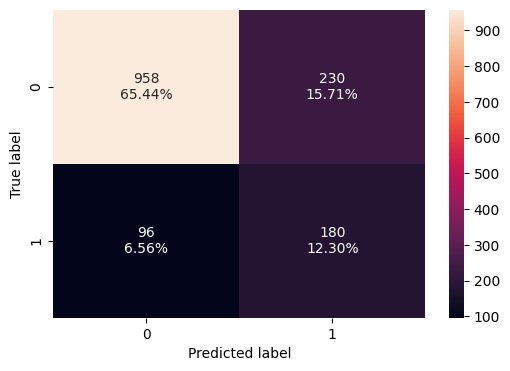

In [ ]:
#Complete the code to get the confusion matrix on test data using the above model
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

**Improving Decision Tree Performance with Principle Component Analysis**

In [ ]:

from sklearn.decomposition import PCA

# Apply PCA to the training data
pca = PCA(n_components=5)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Define and fit the Decision Tree classifier on PCA-transformed training data
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train_pca, y_train)

# Predict on training and testing data
y_train_pred = d_tree.predict(X_train_pca)
y_test_pred = d_tree.predict(X_test_pca)






In [ ]:
# Complete the code to get the model performance
d_tree_model_perf = model_performance_classification_sklearn(d_tree,X_test_pca,y_test)
## Fill in the Blank
print("Testing performance:\n", ____________________)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.771175  0.358696   0.385214  0.371482


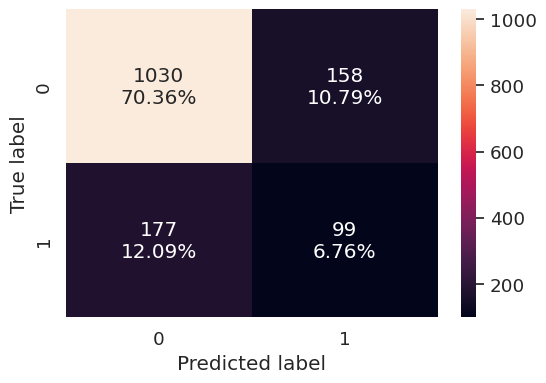

In [ ]:
#  Complete the code to get the Confusion Matrix
#
#

**Improving Decision Tree Performance with Recursive Feature Elimination**

In [ ]:

from sklearn.feature_selection import RFE


# Define the Decision Tree classifier
d_tree = DecisionTreeClassifier()

# Define the RFE object
rfe = RFE(estimator=d_tree, n_features_to_select=5)  # Choose the number of features to select

# Fit RFE to the training data
rfe.fit(X_train, y_train)

# Select features based on RFE rankings
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Fit the Decision Tree model on RFE-selected features
d_tree.fit(X_train_rfe, y_train)

# Predict on training and testing data
y_train_pred = d_tree.predict(X_train_rfe)
y_test_pred = d_tree.predict(X_test_rfe)




In [ ]:
# Complete the code to get the model performance
#
#

Testing performance:
    Accuracy    Recall  Precision      F1
0  0.853142  0.608696   0.610909  0.6098


In [1]:
# Plot confusion matrix for testing data
## Fill in the blanks
confusion_matrix_sklearn(d_tree, ___________, y_test)

NameError: name 'confusion_matrix_sklearn' is not defined

___